# __Chapter 1 : Introduction and Motivation__

__Note__ : This is the 'hello world' equivalent of hypothesis testing. I am generating some random data and then conducting a standard Welch's t-test for significance. In the later chapter, I dive deep into the fundamentals and intuition behind the concept

## Hypothesis Testing:


Formally, __'A statistical hypothesis is a hypothesis that is testable on the basis of observed data modeled as the realised values taken by a collection of random variables.'__[ (Stuart, Ord, Arnold 2010) ](https://www.wiley.com/en-us/Kendall%27s+Advanced+Theory+of+Statistics%2C+Volume+2A%2C+Classical+Inference+and+the+Linear+Model%2C+6th+Edition-p-9780470689240). <br> Informally, A __statistical hypothesis__ is an assumption about population parameter(measurable characteristic of a population such as mean or standard deviation) and __Hypothesis testing__ is the formal procedure used by statisticians (traditionally) to accept or reject the hypothesis. This is a method of _statistical inference_.

To make this more intuitive, let us take a very simple example: <br>

Let us assume that you work for a e-Commerce website and want to increase the user engagement. We decide to initially run an experiment (A/B test) where we change the color of the checkout button for some users from red to green and see if it increases user engagement. For the sake of this example, we define a metric of interest as revenue-per-user. We perform necessary randomization and segment users to A(Control) and B(Treatment). For A users, we do not make any change whereas for B users we introduce the change and after the end of the experiment we observe that the revenue-per-user for B has gone up by 37% whereas for control it is 23% .



There are two types of hypothesis.
- Null Hypothesis : Denoted by $H_{0}$ is the hypothesis that there is no difference between the two samples means.
- Alternative Hypothesis : Denoted by  $H_{A}$ is the counterfactual of $H_{0}$. There is a difference between the two samples means.

<div>
    <center>
    <img src="images/fig-1.png" width="500"/>
        <br>
     <text><b> Fig 1: A simple A/B Framework for Online Controlled Experiments</b> <br> 
         <i> (Source: https://www.optimizely.com/optimization-glossary/ab-testing/)</i>
     </text>
    </center>
</div>


### Experiment setup:
We decide to take 1000 users for Control and 1000 for Treatment(Variation in the above figure). We run the experiment for a week and report back the results. For the sake of this example, we assume that the revenue per user in the experiment spans from 50 dollars to 100 dollars. We use our __key-metric as 'revenue-per-user'__ and report back the results.

So, our experiment includes the following.
- __Metric__ = Revenue-per-user
- __Parameter__ = Also known as the experimental variable that is thought to influence - Change of color of the checkout button.
- __Variant__ = Controls and Treatments (A and B) 
- __Randomization Unit__ = We use a pseudo randomization process to map the users to the variants.

Here, <br>
$H_{0}$ : $Mean_{Control}$ = $Mean_{Treatment}$ <br>
$H_{A}$ : $Mean_{Control}$ $\neq$ $Mean_{Treatment}$


__For the purpose of this experiment I am simulating the results__

In [12]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random 
from scipy.stats import norm
random.seed(30)

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'medium',
          'figure.figsize': (12.5, 9),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)


def generate_data(sample_number):
    revenue_per_user_range = np.arange(50, 100, 0.012)

    #Note THIS IS NOT the Randomization unit. I am just assigning 1000 'users' with random revenue-per-user quantities from the above list
    control = random.choices(revenue_per_user_range, k=sample_number)
    treatment = random.choices(revenue_per_user_range, k=sample_number)
    
    print("{:25s}{:s}{:8.3f}".format("Mean of Control",":", np.mean(control)))
    print("{:25s}{:s}{:8.3f}".format("Mean of Treatment",":", np.mean(treatment)))
    print("{:25s}{:s}{:8.3f}".format("Variance of Control",":", np.var(control)))
    print("{:25s}{:s}{:8.3f}".format("Variance of Treatment",":", np.var(treatment)))
    
    return control,treatment

control,treatment = generate_data(1000)

Mean of Control          :  74.331
Mean of Treatment        :  75.439
Variance of Control      : 210.644
Variance of Treatment    : 208.542


We are going to compute Welch's T-test. We then plot a histogram for both Treatment and Control and it looks like this:

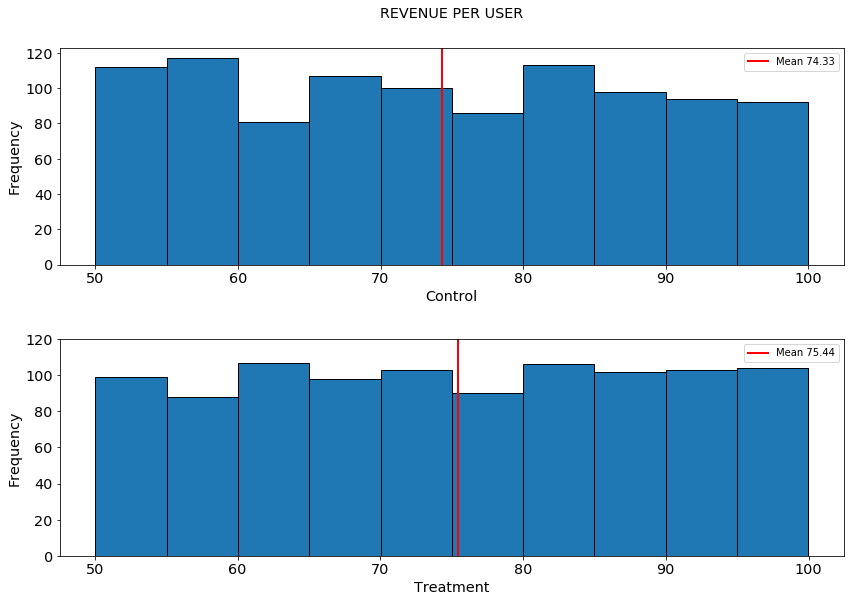

In [2]:
plt.subplot(2,1,1)
plt.hist(control, edgecolor = "black")
plt.axvline(x= np.mean(control), color = "red", linewidth = 2, label='Mean ' + "%.2f" % np.mean(control))
plt.legend()
plt.title("REVENUE PER USER",pad=30)
plt.xlabel("Control"), plt.ylabel("Frequency")
plt.subplot(2,1,2)
plt.hist(treatment, edgecolor = "black")
plt.axvline(x= np.mean(treatment), color = "red", linewidth = 2, label='Mean ' + "%.2f" % np.mean(treatment))
plt.xlabel("Treatment"), plt.ylabel("Frequency")
plt.ylim(0, 120) 
plt.legend()
plt.tight_layout(pad=3.0)

We shall use relative distance as our reporting metric. 


In [3]:
relative_difference = (np.mean(treatment) - np.mean(control)) / np.mean(control)
relative_difference * 100

1.4908478181577318

Now, we have a relative increase of 1.49 percent when comparing the Control and Treatment. Our treatment population performed 'clearly' better and we maybe inclined to push it Treatment into production. But the question is, __is this difference really convincing or is it due to chance? Would the same results occur every time we took the measurements?__. This is where the t-test (one of the many tests) comes in. What it does is not only look at the mean but also the __variance__ (Separate Chapter on the importance of variance) of the two samples and helps compute a p-value. 
<br>
__p-value__ : P-value is the probability of obtaining the result at least as extreme as the sample result based on the assumption that the null hypothesis is true. Contextually, the probability of obtaining the result (difference of 1.49% between Control and Treatment) if the $H_{0}$ was true (there is no difference in the means of the Control and Treatment.)

In [4]:
print("Welch's T test t statistic :", stats.ttest_ind(treatment,control,equal_var = False).statistic)

Welch's T test t statistic : 1.7107370172887062


In [5]:
#computing the p-value
print("Welch's T test p-value :", stats.ttest_ind(treatment,control,equal_var = False).pvalue)

Welch's T test p-value : 0.08728490410371684


Since the common threshold of statistitical significance is 0.05, Here we have failed to reject the null hypothesis. That means that the result we obtained was due to chance. Therefore, it is best for us not to push forward with production.

***

__One Common Misconception__: __Your data has to follow a normal distribution__. <br>

However, The t-test assumes that the means of the different samples are normally distributed; it does not assume that the sample population is normally distributed. By the central limit theorem, means of samples from a population with finite variance approach a normal distribution regardless of the distribution of the population.

## Illustration of Central Limit Theorem:

In probability theory, the central limit theorem establishes that in some situations, when independent random variables are added, their properly normalized sum tends toward a normal distribution, even if the original variables themselves are not normally distributed. To illustrate this, let us take 20 samples from each of the variants 

In [6]:
# a list of sample mean
control_means,treatment_means =[],[]
samplesize = 20

#running 500 simulations of : taking 20 samples and calculating their means
for j in range(0,500):
    sample_control = random.choices(control, k=samplesize)
    control_means.append(sum(sample_control)/len(sample_control))
    sample_treatment = random.choices(treatment, k=samplesize)
    treatment_means.append(sum(sample_treatment)/len(sample_treatment))

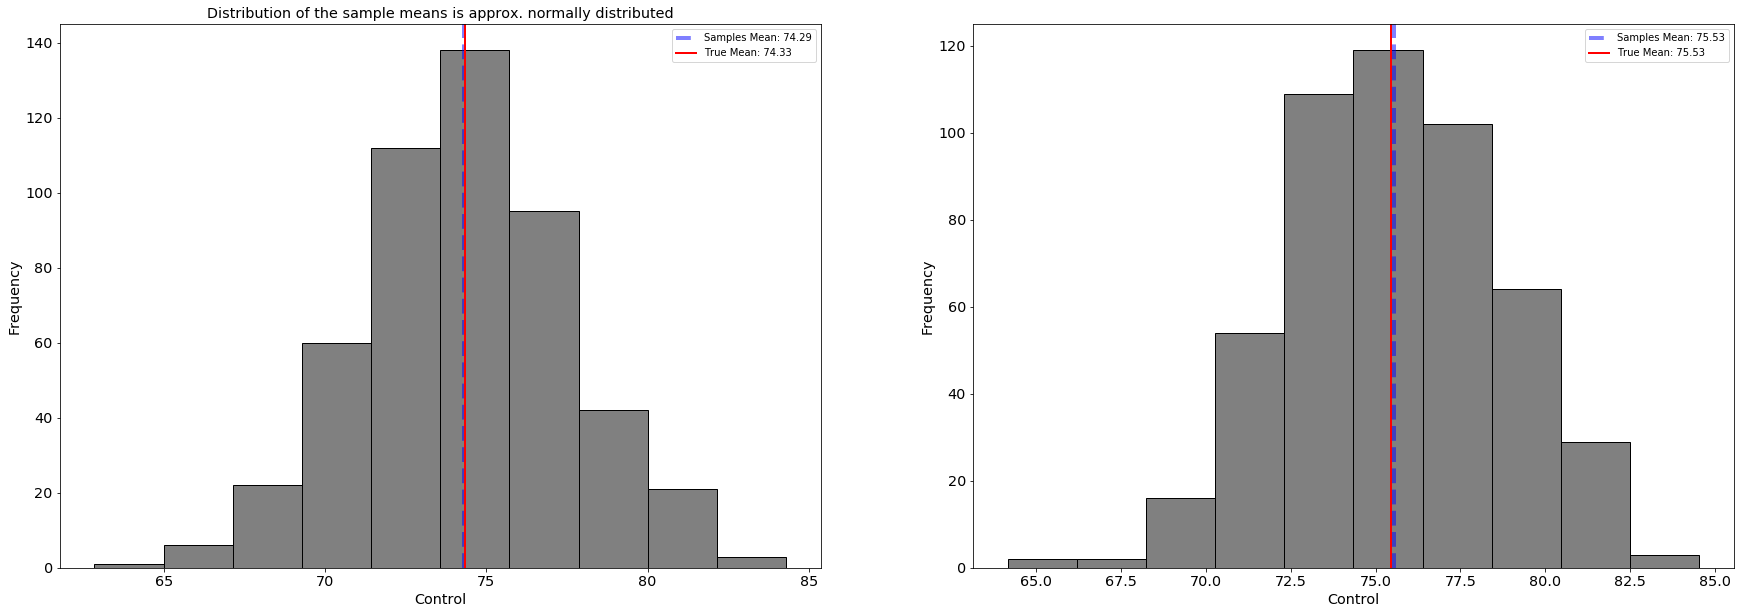

In [46]:

fig = plt.figure(figsize=(30, 10))

ax1 = plt.subplot(1, 2, 1)

plt.hist(control_means, color='grey', edgecolor = "black")
plt.axvline(x= np.mean(control_means), color = "blue", ls='--', linewidth = 4, alpha=0.5, label= f'Samples Mean: ' + "%.2f" % np.mean(control_means))
plt.axvline(x= np.mean(control), color = "red", linewidth = 2, label=f'True Mean: ' + "%.2f" % np.mean(control))
plt.title('Distribution of the sample means is approx. normally distributed')
plt.xlabel("Control")
plt.ylabel("Frequency")
plt.legend()

ax1 = plt.subplot(1, 2, 2)

plt.hist(treatment_means, color='grey', edgecolor = "black")
plt.axvline(x= np.mean(treatment_means), color = "blue", ls='--', linewidth = 4, alpha=0.5, label= f'Samples Mean: ' + "%.2f" % np.mean(treatment_means))
plt.axvline(x= np.mean(treatment), color = "red", linewidth = 2,label= f'True Mean: ' + "%.2f" % np.mean(treatment_means))
plt.xlabel("Control")
plt.ylabel("Frequency")
plt.legend()

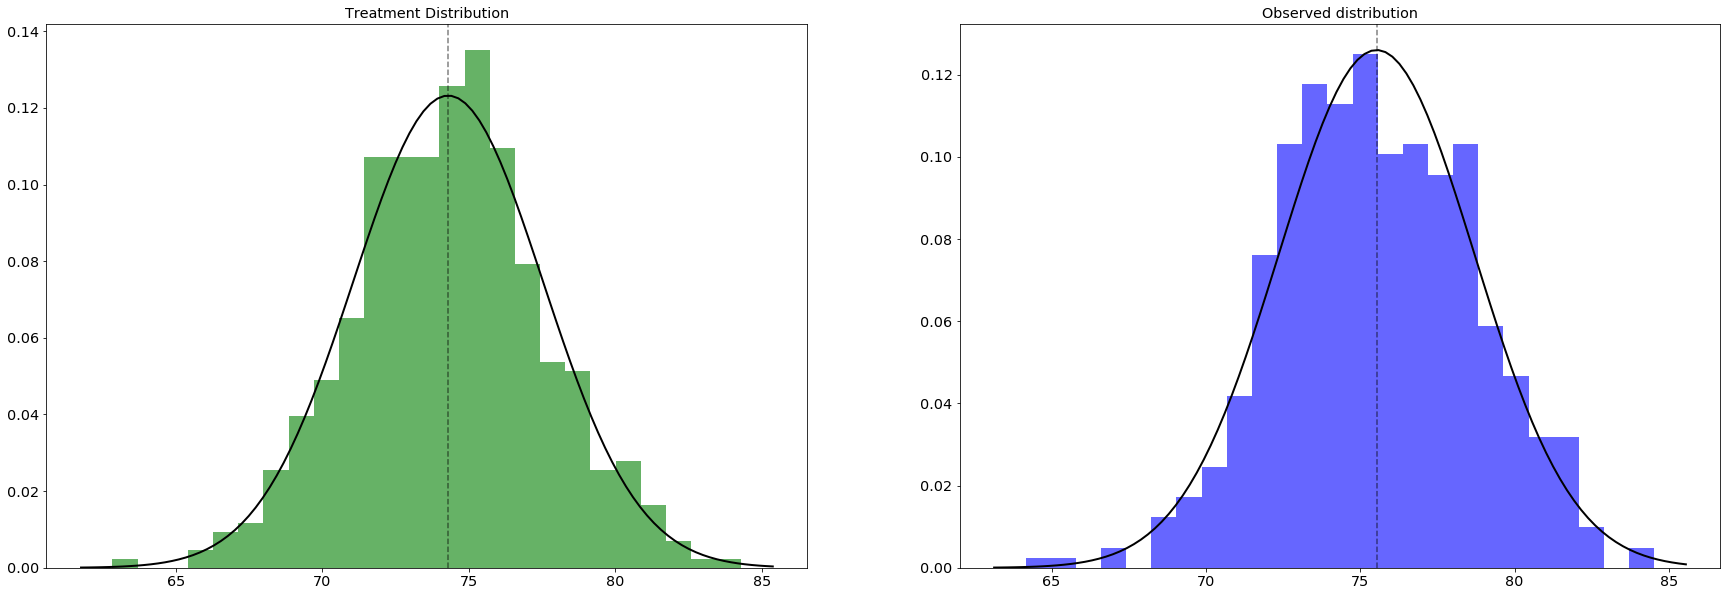

In [47]:


fig = plt.figure(figsize=(30, 10))

ax1 = plt.subplot(1, 2, 1)
# Generate some data for this demonstration.
data = control_means
mu, std = norm.fit(data)
plt.hist(data, bins=25, density=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.axvline(x= mu, color = "black", alpha=0.5,linestyle='--')
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
ax1.title.set_text('Control Distribution')



#observed distribution
ax2 =plt.subplot(1, 2, 2)
ax2.title.set_text('Observed distribution')
data = treatment_means
mu,std = norm.fit(data)
plt.axvline(x= mu, color = "black", alpha=0.5,linestyle='--')
plt.hist(data, bins=25, density=True, alpha=0.6, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
ax1.title.set_text('Treatment Distribution')

plt.show()